# Portfolio Selection Strategies
## Author: Snigdhayan Mahanta
Suppose there are 100 projects to choose from and at most 10 projects can be selected based on the available resources. What should be the strategy to select the projects for execution? To simplify the problem I ignored the project duration so that the `discount rate` can be left out of cost and value calculations. I also ignored the project quality since it is not easily quantifiable. Hence each project consists of the following attributes:

1. `Value` - this is a higher abstraction of scope that the project execution achieves (cash inflow)
2. `Risk` - this is the probability of failure of the project (should be greater than `inherent risk`)
3. `Cost` - this is some abstract estimate of the project expenses (cash outflow)

I created two configurable parameters - `inherent risk` and `risk tolerance`. Each project has a minimum `inherent risk`. A project is considered for portfolio selection only if its associated `risk` falls below the value of `risk tolerance`. Based on this information I can think of two simple strategies:

1. Strategy 1 (Expected Return) - rank the projects according to `expected value` (taking into account the risk probabilities).
2. Strategy 2 (ROI) - rank the projects according to `normalized value` (i.e., value divided by cost) ignoring risk.

After creating a random portfolio of projects satisfying the boundary conditions, I applied the two selection strategies and compared the outcomes. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Global configurable parameters
inherent_risk = 10 # minimum risk involved in any project as a percentage
risk_tolerance = 90 # configurable but should be greater than inherent_risk

In [3]:
# Definition of project
class Project:
    '''
    A project has the following attributes: 'value', 'risk' and 'cost'
    
    '''
    
    def __init__(self, inherent_risk, risk_tolerance):
        self.value = np.random.choice(a=range(100, 10000))
        self.risk = np.random.choice(a=range(inherent_risk, risk_tolerance))/100
        self.cost = np.random.choice(a=range(100, 1000))

    def outcome(self):
        return np.random.choice(a=[0,1], p=[self.risk, 1-self.risk]) # 0 = failure, 1 = success  
    
    def expected_value(self):
        return (self.value-self.cost)*(1-self.risk) - self.cost*self.risk
    
    def normalized_value(self):
        return self.value/self.cost
    
    def earned_value(self):
        return self.outcome()*self.value - self.cost

In [4]:
# Portfolio creation function
def create_portfolio(n_projects, inherent_risk, risk_tolerance):
    '''
    create a portfolio of projects

    '''
    
    expected_values_dict = {}
    normalized_values_dict = {}
    earned_values_dict = {}
    
    for i in range(1, n_projects+1):
        proj = Project(inherent_risk, risk_tolerance)
        key_1 = i 
        key_2 = i
        key_3 = i
        expected_values_dict[key_1] = proj.expected_value()
        normalized_values_dict[key_2] = proj.normalized_value()
        earned_values_dict[key_3] = proj.earned_value()
        
    return expected_values_dict, normalized_values_dict, earned_values_dict

In [5]:
# Experiment parameters
n_projects = 100 # total number of projects considered in the portfolio
n_selected = 10 # number of projects to be selected for execution (must be fewer than n_projects)
exp_vals, norm_vals, earn_vals = create_portfolio(n_projects, inherent_risk, risk_tolerance)

In [6]:
# Strategy 1 - select projects based on expected value
exp_vals = dict(sorted(exp_vals.items(), key=lambda item: item[1], reverse=True))
exp_vals = list(exp_vals.items())
exp_vals = exp_vals[0:n_selected]
selected_projects_1 = [element[0] for element in exp_vals]

In [7]:
# Strategy 2 - select projects based on normalized value
norm_vals = dict(sorted(norm_vals.items(), key=lambda item: item[1], reverse=True))
norm_vals = list(norm_vals.items())
norm_vals = norm_vals[0:n_selected]
selected_projects_2 = [element[0] for element in norm_vals]

In [8]:
# Comparison of the two selection strategies
data = {'Strategy 1 - Expected Values': exp_vals, 'Strategy 2 - Normalized Values': norm_vals}
project_selection = pd.DataFrame(data=data)
project_selection

,Strategy 1 - Expected Values,Strategy 2 - Normalized Values
0,"(99, 8181.259999999999)","(4, 88.1047619047619)"
1,"(5, 7612.04)","(12, 76.35643564356435)"
2,"(93, 6793.6)","(73, 62.675862068965515)"
3,"(52, 6748.25)","(79, 59.88819875776397)"
4,"(73, 6580.12)","(86, 47.63978494623656)"
5,"(38, 6439.64)","(15, 46.19417475728155)"
6,"(86, 6282.53)","(97, 40.63157894736842)"
7,"(33, 6081.320000000001)","(33, 39.26457399103139)"
8,"(12, 5991.4800000000005)","(85, 33.94570135746606)"
9,"(58, 5656.18)","(28, 32.333333333333336)"


In [9]:
# Projects selected by both strategies
common_selection = list(set(selected_projects_1).intersection(selected_projects_2))
print(F'Projects selected by both strategies = {common_selection}')

Projects selected by both strategies = [73, 12, 86, 33]


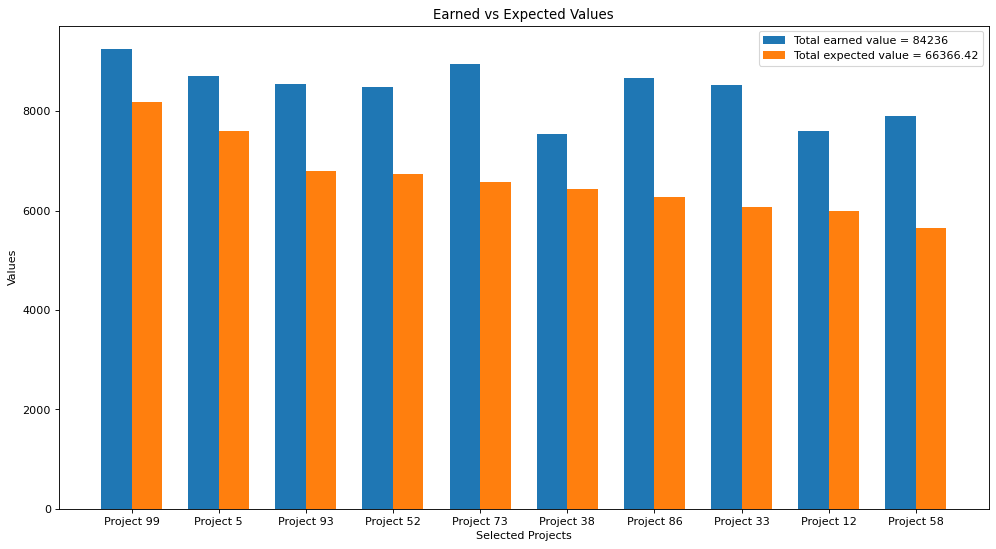

In [10]:
# Visualize the expected vs the earned values
labels = ["Project "+str(p) for p in selected_projects_1]
x = np.arange(len(labels))  # the label locations

y1 = [earn_vals[n] for n in selected_projects_1]
tot_earn_val = round(sum(y1),2)

y2 = [element[1] for element in exp_vals]
tot_exp_val = round(sum(y2),2)

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
rects1 = ax.bar(x - width/2, y1, width, label='Earned')
rects2 = ax.bar(x + width/2, y2, width, label='Expected')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Selected Projects')
ax.set_ylabel('Values')
ax.set_title('Earned vs Expected Values')
ax.set_xticks(x)
ax.set_xticklabels(labels)
legends = [F'Total earned value = {tot_earn_val}', 
           F'Total expected value = {tot_exp_val}']
ax.legend(legends, loc='upper right')

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

#fig.tight_layout()

plt.show()

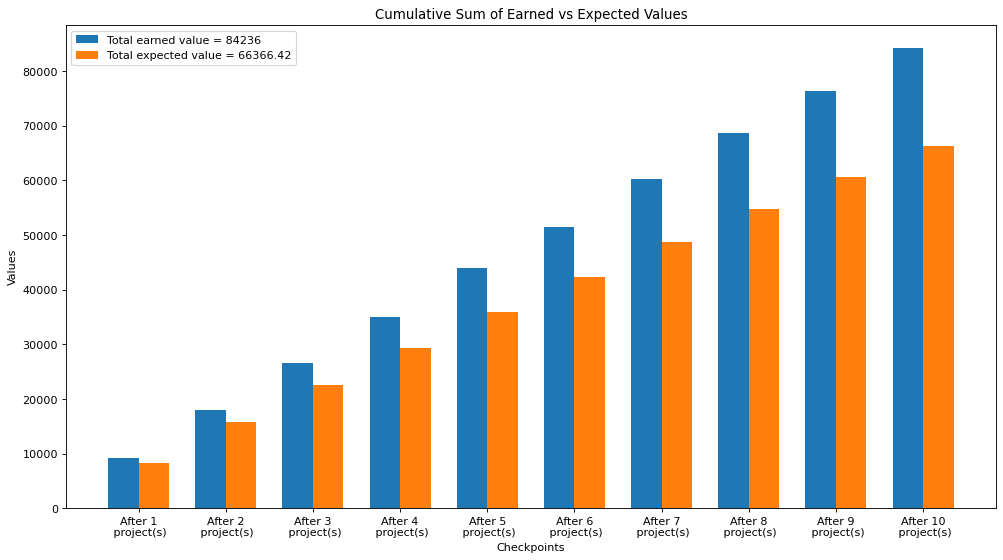

In [11]:
# Visualize the cumulative sum of expected vs the earned values
labels = ["After "+str(p)+"\n project(s)" for p in range(1,11)]
x = np.arange(len(labels))  # the label locations
y1 = np.cumsum(y1)
y2 = np.cumsum(y2)

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
rects1 = ax.bar(x - width/2, y1, width, label='Earned')
rects2 = ax.bar(x + width/2, y2, width, label='Expected')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Checkpoints')
ax.set_ylabel('Values')
ax.set_title('Cumulative Sum of Earned vs Expected Values')
ax.set_xticks(x)
ax.set_xticklabels(labels)
legends = [F'Total earned value = {tot_earn_val}', 
           F'Total expected value = {tot_exp_val}']
ax.legend(legends, loc='upper left')

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

#fig.tight_layout()

plt.show()

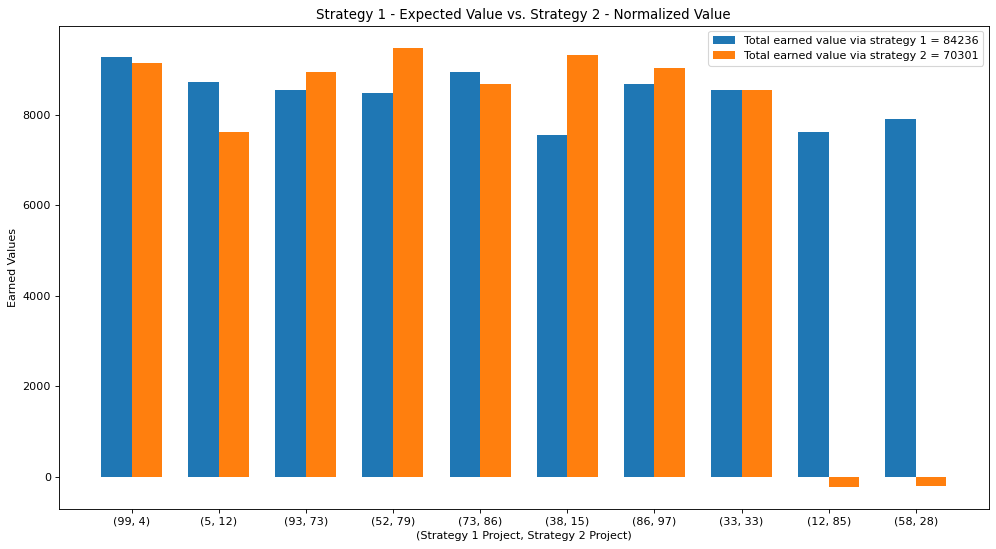

In [12]:
# Visualize the comparison of the two strategies
labels = list(zip(selected_projects_1, selected_projects_2))
x = np.arange(len(labels))  # the label locations

y1 = [earn_vals[n] for n in selected_projects_1]
tot_earn_val_1 = round(sum(y1),2)

y2 = [earn_vals[n] for n in selected_projects_2]
tot_earn_val_2 = round(sum(y2),2)

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
rects1 = ax.bar(x - width/2, y1, width, label=selected_projects_1)
rects2 = ax.bar(x + width/2, y2, width, label=selected_projects_2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('(Strategy 1 Project, Strategy 2 Project)')
ax.set_ylabel('Earned Values')
ax.set_title('Strategy 1 - Expected Value vs. Strategy 2 - Normalized Value')
ax.set_xticks(x)
ax.set_xticklabels(labels)
legends = [F'Total earned value via strategy 1 = {tot_earn_val_1}', 
           F'Total earned value via strategy 2 = {tot_earn_val_2}']
ax.legend(legends, loc='upper right')

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

#fig.tight_layout()

plt.show()

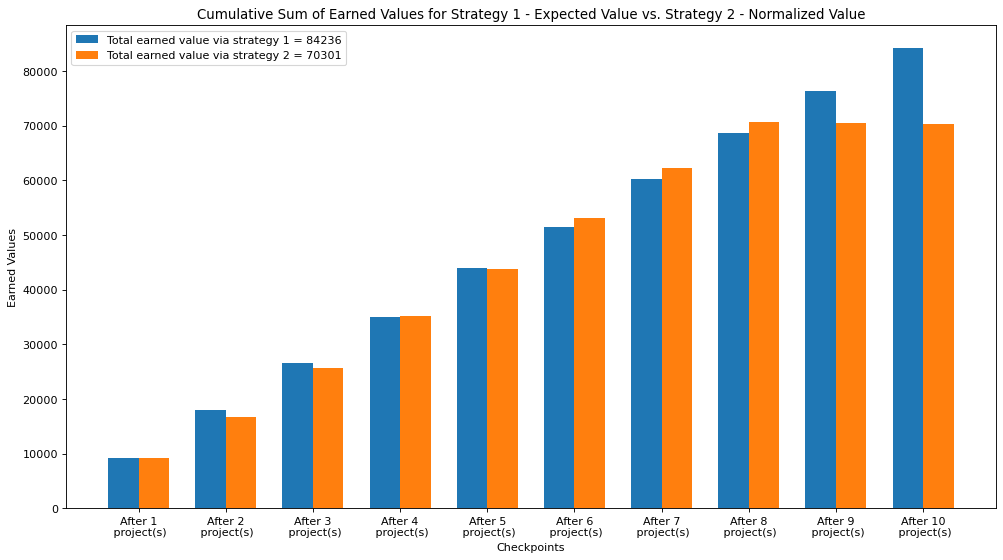

In [13]:
# Visualize the comparison of the two strategies via the cumulative sum of earned values
labels = ["After "+str(p)+"\n project(s)" for p in range(1,11)]
x = np.arange(len(labels))  # the label locations
y1 = np.cumsum(y1)
y2 = np.cumsum(y2)

width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
rects1 = ax.bar(x - width/2, y1, width, label=selected_projects_1)
rects2 = ax.bar(x + width/2, y2, width, label=selected_projects_2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Checkpoints')
ax.set_ylabel('Earned Values')
ax.set_title('Cumulative Sum of Earned Values for Strategy 1 - Expected Value vs. Strategy 2 - Normalized Value')
ax.set_xticks(x)
ax.set_xticklabels(labels)
legends = [F'Total earned value via strategy 1 = {tot_earn_val_1}', 
           F'Total earned value via strategy 2 = {tot_earn_val_2}']
ax.legend(legends, loc='upper left')

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

#fig.tight_layout()

plt.show()

In [14]:
# Simulate to analyze the performance of the two strategies as functions of the 'risk tolerance' parameter
def simulate_return_performance(inherent_risk, n_steps, n_projects, n_selected):
    risk_tolerance_list = []
    tot_earn_val_exp_return = []
    tot_earn_val_roi = []
    for i in range(1, n_steps):
        risk_tolerance = int(inherent_risk + i*((100 - inherent_risk)/n_steps))
        risk_tolerance_list.append(risk_tolerance)
        exp_vals, norm_vals, earn_vals = create_portfolio(n_projects, inherent_risk, risk_tolerance)
       
        exp_vals = dict(sorted(exp_vals.items(), key=lambda item: item[1], reverse=True))
        exp_vals = list(exp_vals.items())
        exp_vals = exp_vals[0:n_selected]
        selected_projects_1 = [element[0] for element in exp_vals]
        y1 = [earn_vals[n] for n in selected_projects_1]
        tot_earn_val_exp_return.append(sum(y1))
        
        norm_vals = dict(sorted(norm_vals.items(), key=lambda item: item[1], reverse=True))
        norm_vals = list(norm_vals.items())
        norm_vals = norm_vals[0:n_selected]
        selected_projects_2 = [element[0] for element in norm_vals]
        y2 = [earn_vals[n] for n in selected_projects_2]
        tot_earn_val_roi.append(sum(y2))
        
    return risk_tolerance_list, tot_earn_val_exp_return, tot_earn_val_roi

In [15]:
# Simulate the performance of the two strategies as the 'risk tolerance' level varies
inherent_risk = 10 # minimum risk involved in any project as a percentage
n_steps = 99 - inherent_risk # number of incremental steps of 'risk tolerance' between 'inherent risk' and maximum risk = 99%
n_projects = 100 # number of projects under consideration
n_selected = 10 # number of projects to be selected for execution (must be fewer than n_projects)
risk_tolerance_list, strategy1, strategy2 = simulate_return_performance(inherent_risk, n_steps, n_projects, n_selected)

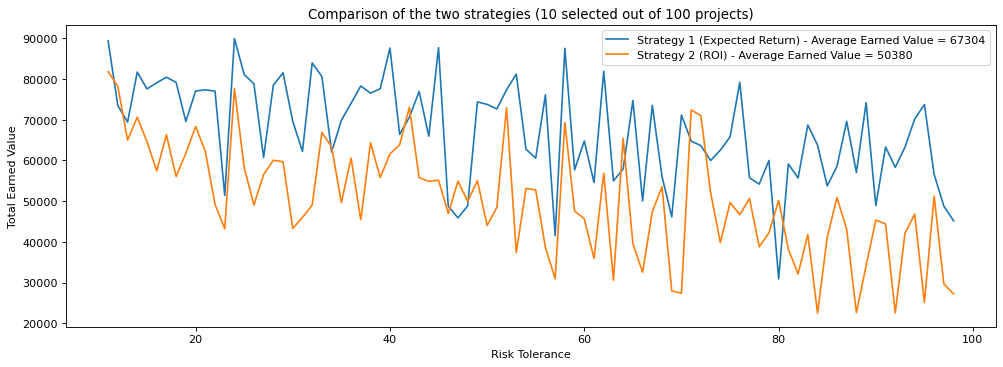

In [16]:
# Visualize the comparison of the two strategies as functions of the 'risk tolerance' parameter
plt.figure(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

# Plot the points
# x-axis values 
x = risk_tolerance_list
# y-axis values 
y1 = strategy1
plt.plot(x, y1)

# x-axis values 
x = risk_tolerance_list
# y-axis values 
y2 = strategy2
plt.plot(x, y2)

# x-axis label
plt.xlabel(F'Risk Tolerance') 

# y-axis label
plt.ylabel(F'Total Earned Value') 

# Title
plt.title(F'Comparison of the two strategies ({n_selected} selected out of {n_projects} projects)')

legends = [F'Strategy 1 (Expected Return) - Average Earned Value = {round(sum(y1)/len(y1))}', 
           F'Strategy 2 (ROI) - Average Earned Value = {round(sum(y2)/len(y2))}']
plt.legend(legends, loc='upper right')

plt.show()

In [17]:
# Simulate the performance of the two strategies as the 'risk tolerance' level varies
inherent_risk = 20 # minimum risk involved in any project as a percentage
n_steps = 99 - inherent_risk # number of incremental steps of 'risk tolerance' between 'inherent risk' and maximum risk = 99%
n_projects = 500 # number of projects under consideration
n_selected = 50 # number of projects to be selected for execution (must be fewer than n_projects)
risk_tolerance_list, strategy1, strategy2 = simulate_return_performance(inherent_risk, n_steps, n_projects, n_selected)

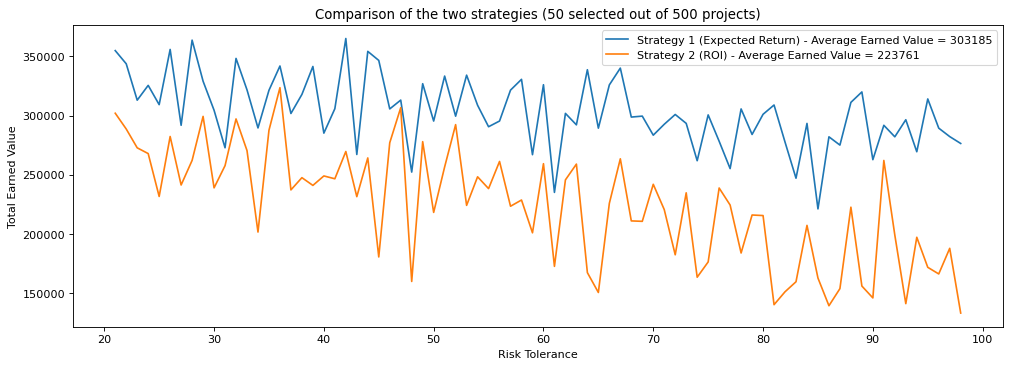

In [18]:
# Visualize the comparison of the two strategies as functions of the 'risk tolerance' parameter
plt.figure(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

# Plot the points
# x-axis values 
x = risk_tolerance_list
# y-axis values 
y1 = strategy1
plt.plot(x, y1)

# x-axis values 
x = risk_tolerance_list
# y-axis values 
y2 = strategy2
plt.plot(x, y2)

# x-axis label
plt.xlabel(F'Risk Tolerance') 

# y-axis label
plt.ylabel(F'Total Earned Value') 

# Title
plt.title(F'Comparison of the two strategies ({n_selected} selected out of {n_projects} projects)')

legends = [F'Strategy 1 (Expected Return) - Average Earned Value = {round(sum(y1)/len(y1))}', 
           F'Strategy 2 (ROI) - Average Earned Value = {round(sum(y2)/len(y2))}']
plt.legend(legends, loc='upper right')

plt.show()

I designed this experiment to ascertain the relative performance of the two strategies as the `risk tolerance` level varies. The figure above gives some indication. For a fixed `risk tolerance` level, one can generate many samples and perform ANOVA test to assess the relative performance of the two strategies; this process can then be repeated as the `risk tolerance` level varies.